# Rainfall Prediction - Weather Forecasting

Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('weatherfile')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(8425, 23)

Given data contains 8425 rows and 23 columns.

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Given dataset contains 16 float and 7 object datatype.

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


# checking for null values:

In [10]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8421,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8422,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8423,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
df.isnull().sum().sum()

19472

In [13]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

<AxesSubplot:>

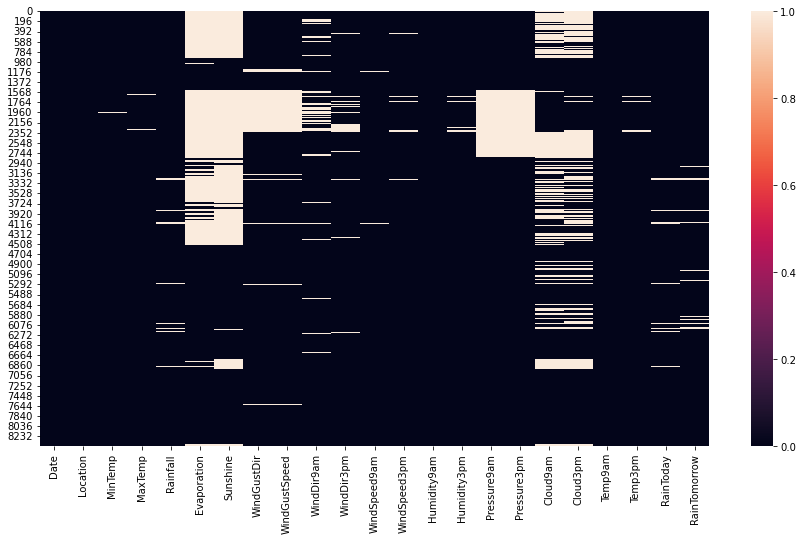

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [15]:
# There are so many missing values are present in dataset

In [16]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [18]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [19]:
catg_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [20]:
cont_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

([<matplotlib.patches.Wedge at 0x1d2133b0df0>,
 [Text(0.6343483909086429, 0.8986668564888858, 'Categorical'),
  Text(-0.6343483909086428, -0.8986668564888859, 'Continuous')],
 [Text(0.3460082132228961, 0.4901819217212104, '30.4%'),
  Text(-0.34600821322289604, -0.49018192172121045, '69.6%')])

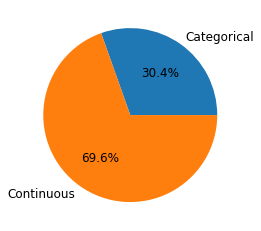

In [21]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')


In [22]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

No     73.531157
Yes    23.632047
NaN     2.836795
Name: RainTomorrow, dtype: float64

In [24]:
target_df=df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100


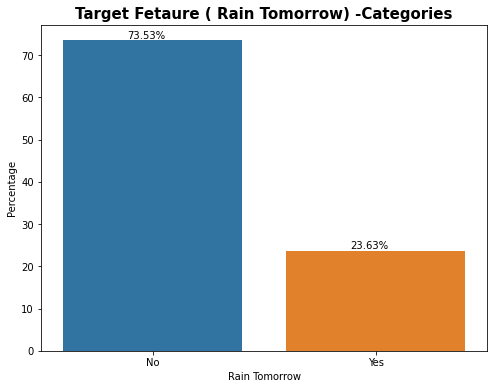

In [25]:
plt.figure(figsize=(8,6))
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Percentage')



for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x +width/2.8,height+.5,f'{height:.2f}%')

In [26]:
df['Date'].nunique()


3004

In [27]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [28]:
df['Location'].value_counts()


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

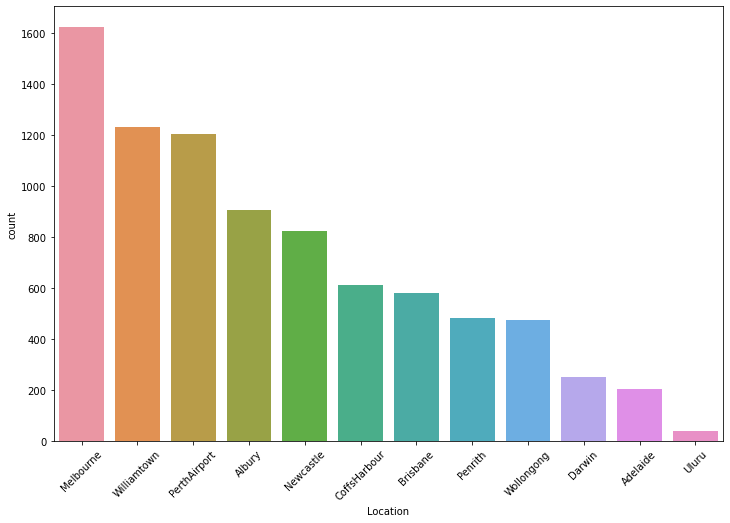

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

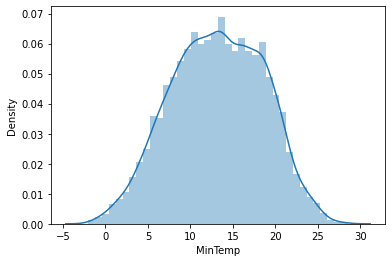

In [30]:
sns.distplot(df['MinTemp'])


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

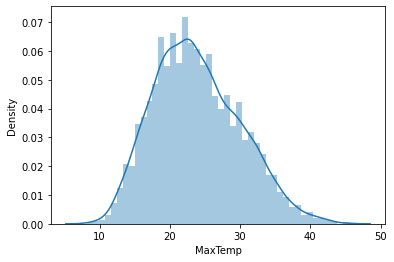

In [31]:
sns.distplot(df['MaxTemp'])


In [34]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

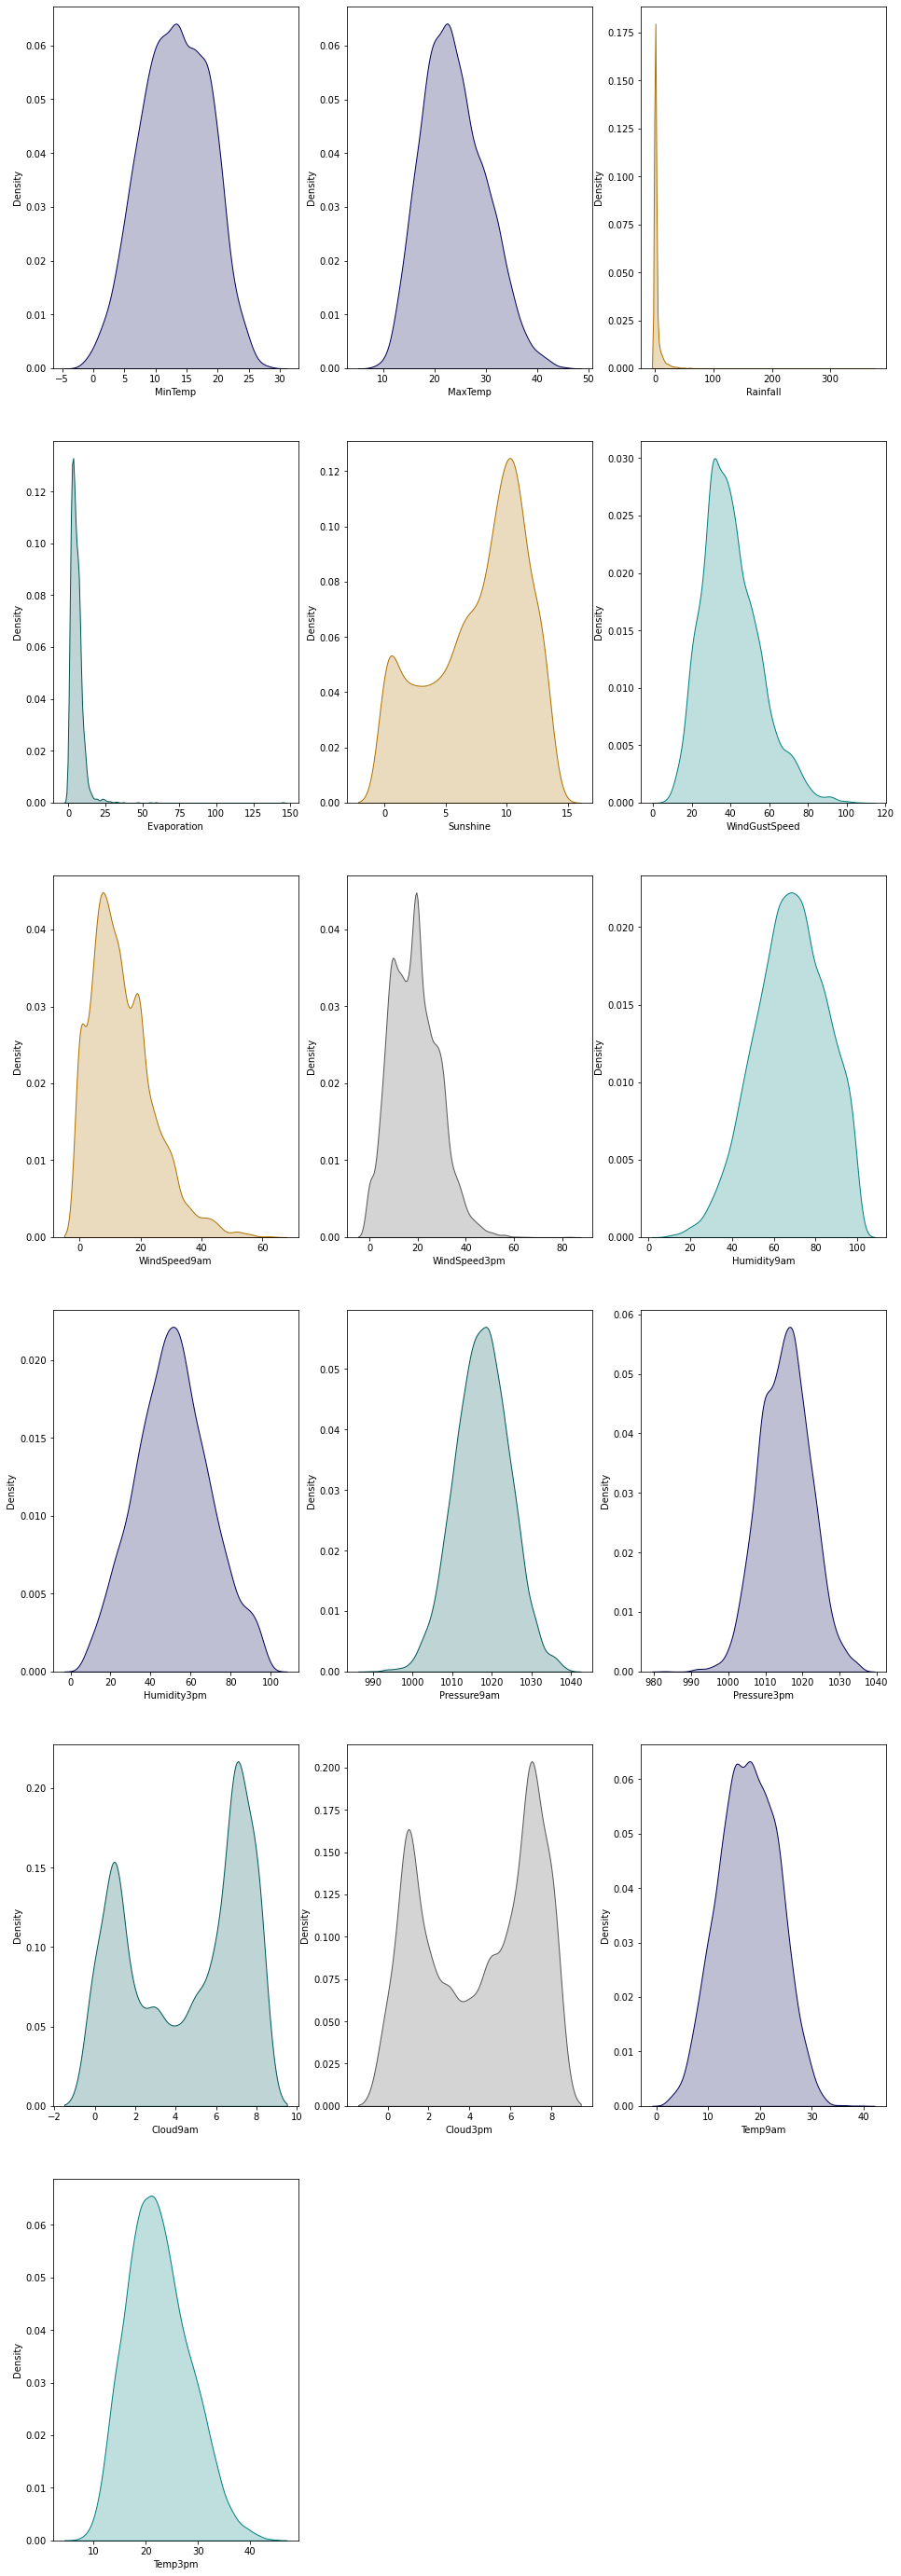

In [35]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

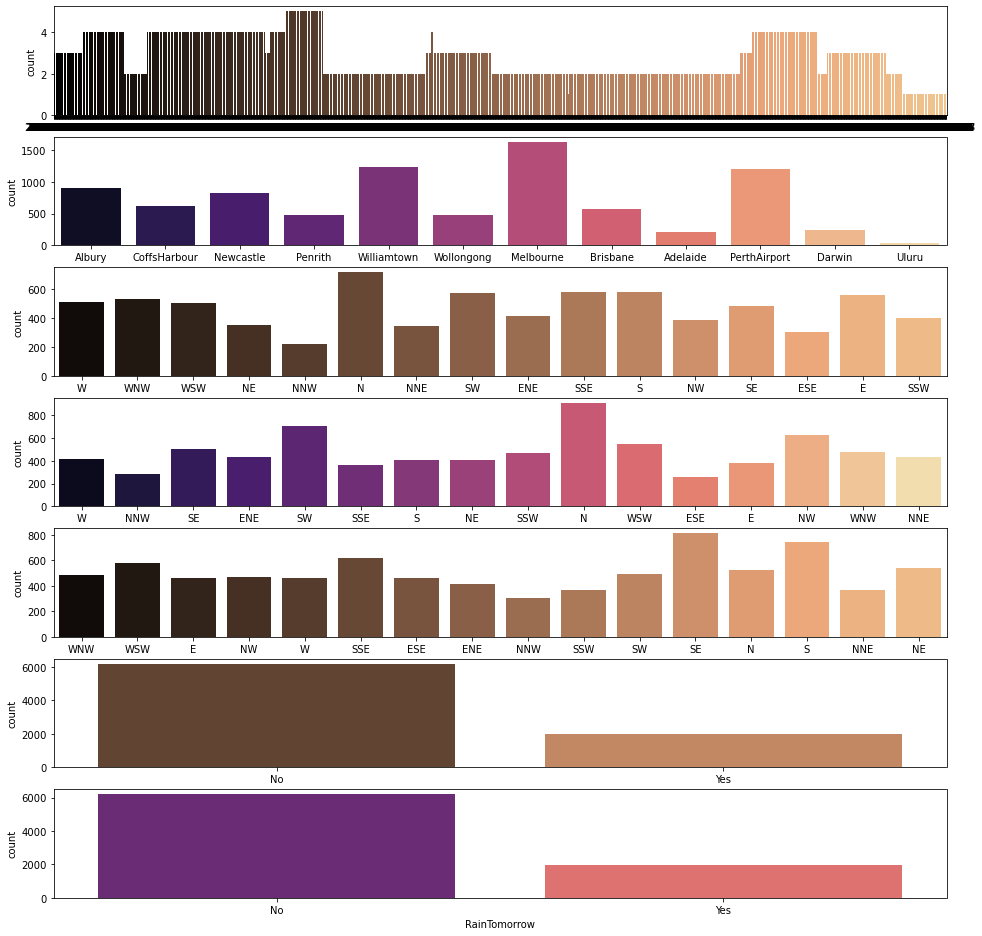

In [36]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

In [37]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [38]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

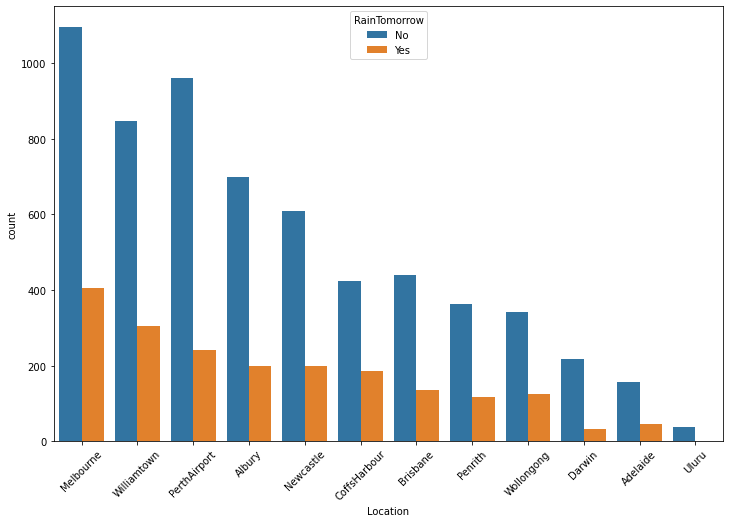

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index,hue=df['RainTomorrow'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Location'>

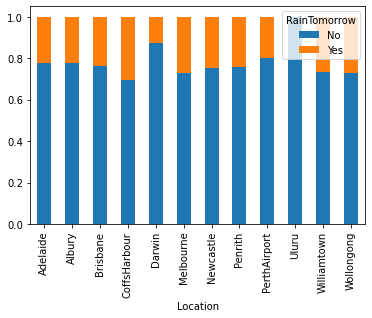

In [40]:
table=pd.crosstab(df['Location'],df['RainTomorrow'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

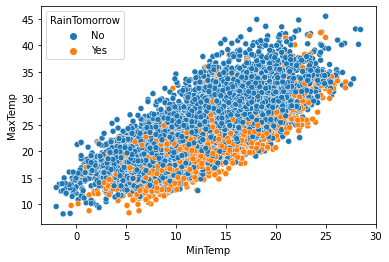

In [41]:
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)


<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

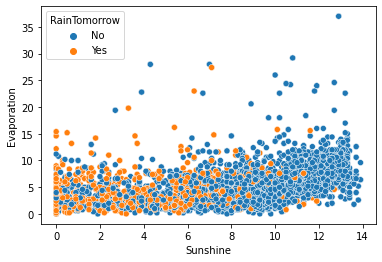

In [42]:
sns.scatterplot(df['Sunshine'],df['Evaporation'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindGustDir'>

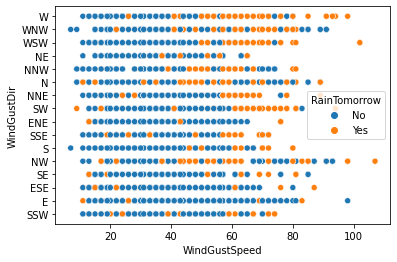

In [43]:
sns.scatterplot(df['WindGustSpeed'],df['WindGustDir'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindDir9am'>

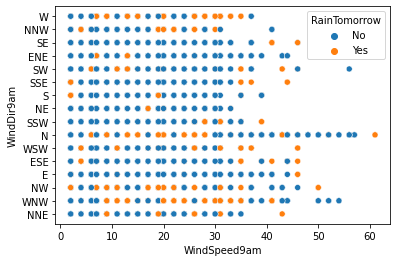

In [44]:
sns.scatterplot(df['WindSpeed9am'],df['WindDir9am'],hue='RainTomorrow',data=df)


<AxesSubplot:xlabel='WindSpeed3pm', ylabel='WindDir3pm'>

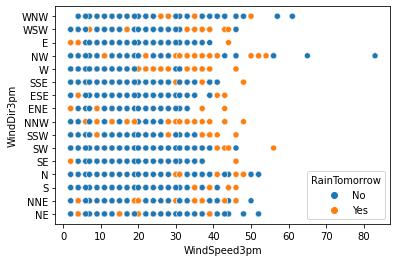

In [45]:
sns.scatterplot(df['WindSpeed3pm'],df['WindDir3pm'],hue='RainTomorrow',data=df)


In [46]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

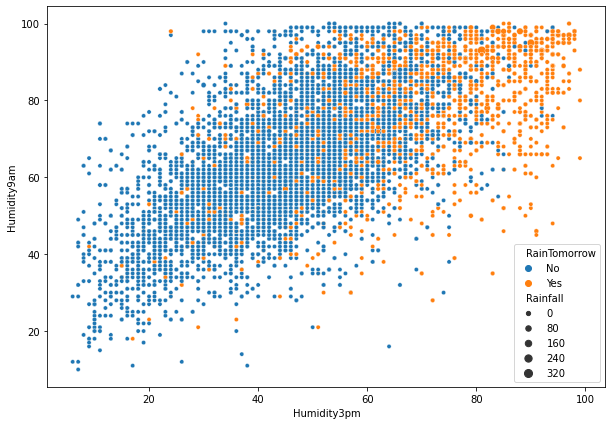

In [47]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

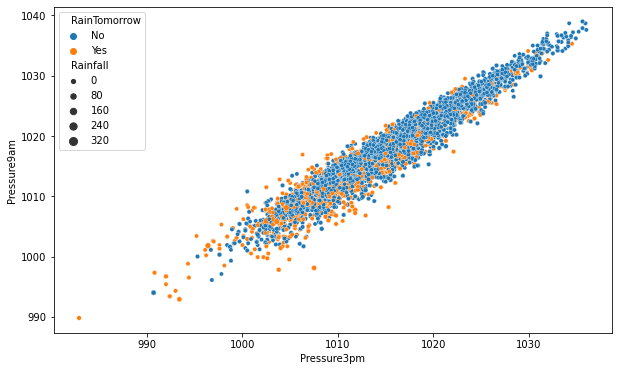

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Pressure3pm'],df['Pressure9am'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

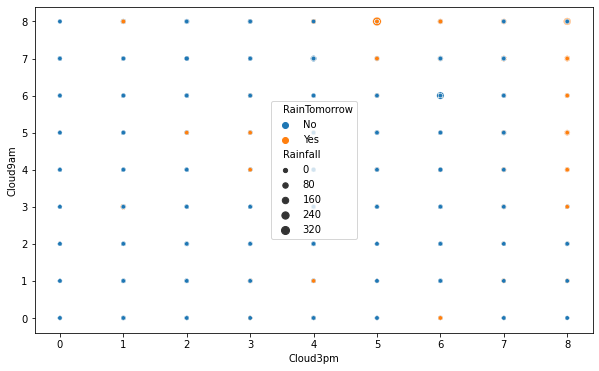

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Cloud3pm'],df['Cloud9am'],hue='RainTomorrow',size='Rainfall',data=df)


In [50]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [51]:
df.groupby('RainToday')['RainTomorrow'].value_counts()

RainToday  RainTomorrow
No         No              5142
           Yes              978
Yes        No              1013
           Yes              946
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

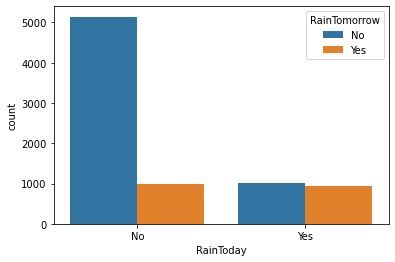

In [52]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])

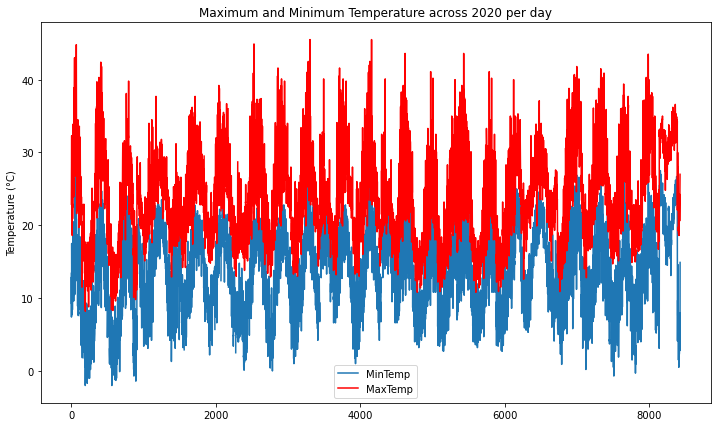

In [53]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()


In [54]:
#df['RainTomorrow'].replace('No',0,inplace=True)
#df['RainTomorrow'].replace('Yes',1,inplace=True)

In [55]:
#df['RainToday'].replace('No',0,inplace=True)
#df['RainToday'].replace('Yes',1,inplace=True)

<AxesSubplot:>

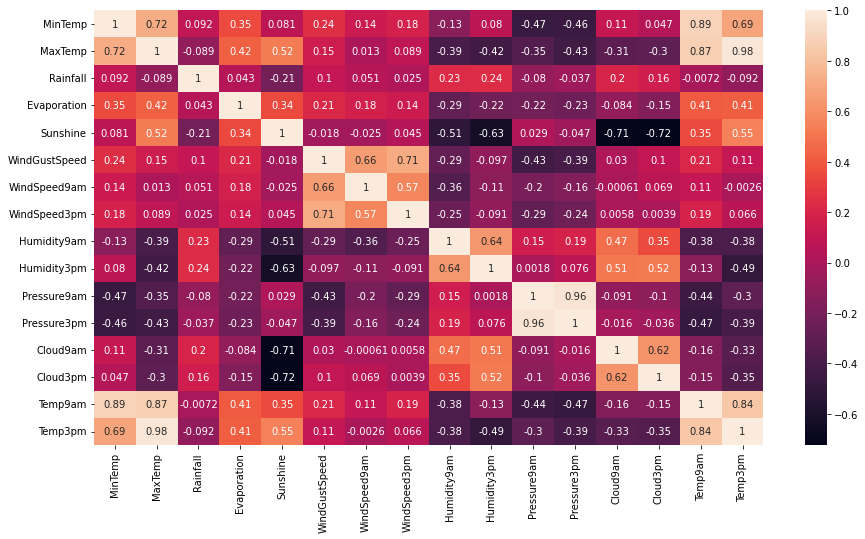

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [57]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [59]:
# seprate database on basis of RainTomorrow

yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [60]:
yes_rain.shape , no_rain.shape

((1991, 23), (6195, 23))

In [61]:
# For Temparatures replacing NaN with its respective mode value # Mode is most repeated values


In [62]:
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)

In [63]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [65]:
yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)



yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)

In [66]:
data= yes_rain.append(no_rain, ignore_index=True)

In [67]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2017-06-20,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.0,4.0,9.4,20.9,No,No
8182,2017-06-21,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.0,4.0,10.1,22.4,No,No
8183,2017-06-22,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.0,4.0,10.9,24.5,No,No
8184,2017-06-23,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.0,4.0,12.5,26.1,No,No


In [68]:
data.shape

(8186, 23)

In [69]:
data.dropna(inplace=True)

In [70]:
#data['RainTomorrow'].replace('No',0,inplace=True)
#data['RainTomorrow'].replace('Yes',1,inplace=True)

#data['RainToday'].replace('No',0,inplace=True)
#data['RainToday'].replace('Yes',1,inplace=True)

In [71]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes


In [72]:
# COnvert Date feature into datetime
data['Date']=pd.to_datetime(data['Date'])

In [73]:
data['year']=data['Date'].dt.year

In [74]:
data['month']=data['Date'].dt.month

In [75]:
data['day']=data['Date'].dt.day

In [76]:
data.drop('Date',axis=1,inplace=True)

In [77]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,E,...,1021.2,4.0,4.0,9.4,20.9,No,No,2017,6,20
8182,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,ENE,...,1020.3,4.0,4.0,10.1,22.4,No,No,2017,6,21
8183,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,N,...,1019.1,4.0,4.0,10.9,24.5,No,No,2017,6,22
8184,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,WNW,...,1016.8,4.0,4.0,12.5,26.1,No,No,2017,6,23


In [78]:
d1=data  # will be used for regression problem

In [79]:
num=[col for col in data.columns if data[col].dtypes!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

In [80]:
v=data[num]

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [84]:
VIF

,features,vif
0,MinTemp,8.536558
1,MaxTemp,25.650652
2,Rainfall,1.131077
3,Evaporation,1.217936
4,Sunshine,2.137066
5,WindGustSpeed,2.353808
6,WindSpeed9am,2.030998
7,WindSpeed3pm,1.946039
8,Humidity9am,3.854017
9,Humidity3pm,5.579726


In [85]:
num.remove('Temp3pm')

In [86]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.466862
1,MaxTemp,9.254373
2,Rainfall,1.129338
3,Evaporation,1.217434
4,Sunshine,2.137021
5,WindGustSpeed,2.342729
6,WindSpeed9am,2.030727
7,WindSpeed3pm,1.941617
8,Humidity9am,3.374870
9,Humidity3pm,3.788957


In [87]:
num.remove('Pressure9am')

In [88]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.282180
1,MaxTemp,8.650329
2,Rainfall,1.124425
3,Evaporation,1.216592
4,Sunshine,2.134751
5,WindGustSpeed,2.325879
6,WindSpeed9am,2.025740
7,WindSpeed3pm,1.930832
8,Humidity9am,3.374529
9,Humidity3pm,3.783076


In [89]:
num.remove('Temp9am')

In [90]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,4.222621
1,MaxTemp,4.951979
2,Rainfall,1.121856
3,Evaporation,1.215636
4,Sunshine,2.131929
5,WindGustSpeed,2.291850
6,WindSpeed9am,2.006285
7,WindSpeed3pm,1.879912
8,Humidity9am,2.349810
9,Humidity3pm,2.972785


In [91]:
data.shape

(8079, 25)

In [92]:
data.drop(['Temp3pm','Temp9am','Pressure9am'],axis=1,inplace=True)

In [93]:
data.shape

(8079, 22)

In [94]:
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,42.0,9.0,1003.6,7.0,7.0,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,48.0,22.0,1008.7,7.0,7.0,No,Yes,2008,12,11


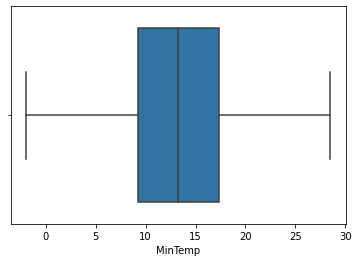

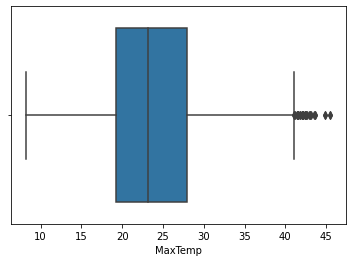

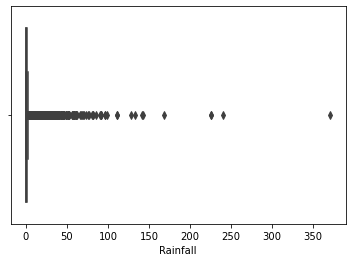

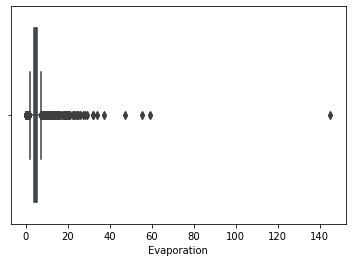

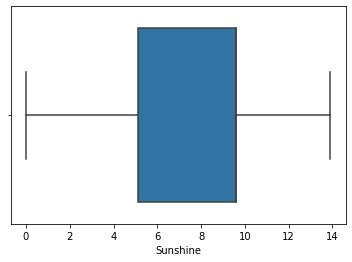

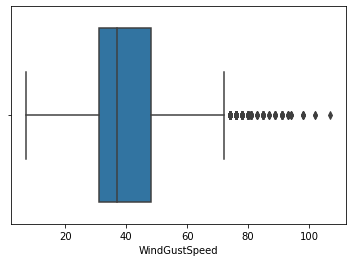

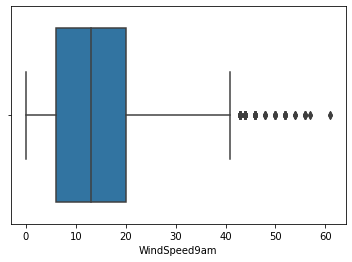

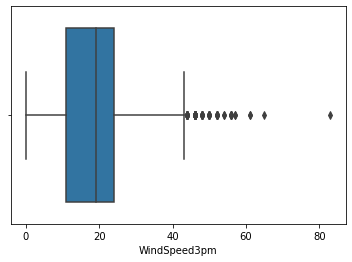

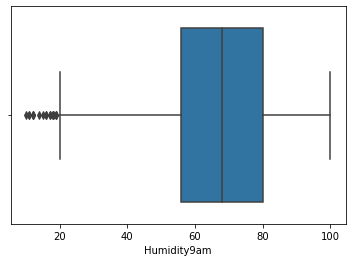

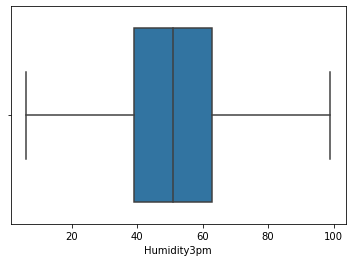

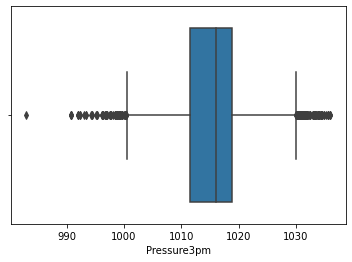

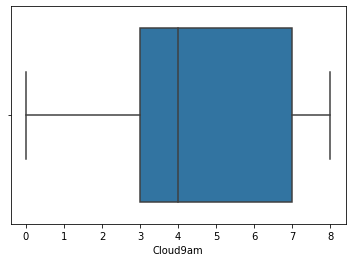

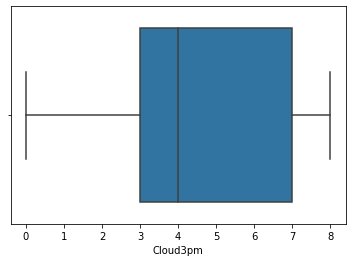

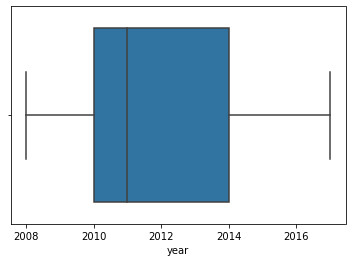

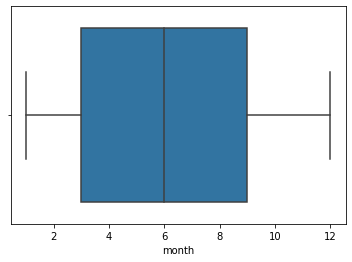

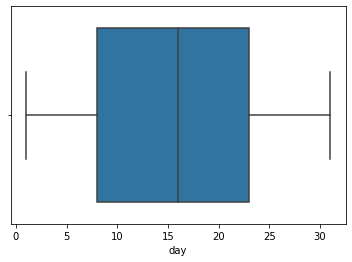

In [95]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

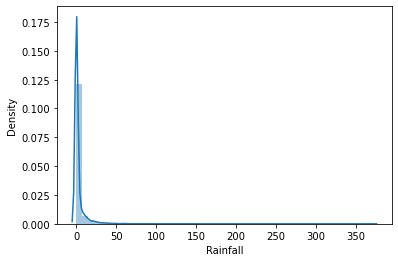

In [96]:
sns.distplot(data['Rainfall'])

In [97]:
data[num].skew()

MinTemp          -0.070098
MaxTemp           0.394841
Rainfall         13.073756
Evaporation      13.998671
Sunshine         -0.822526
WindGustSpeed     0.784800
WindSpeed9am      0.949237
WindSpeed3pm      0.509973
Humidity9am      -0.250378
Humidity3pm       0.118933
Pressure3pm      -0.011625
Cloud9am         -0.261462
Cloud3pm         -0.185359
year              0.421639
month             0.054225
day               0.000577
dtype: float64

In [98]:
for i in num:
    IQR= data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25) - (1.5 * IQR)
    upper=data[i].quantile(.75) + (1.5 * IQR)
    data[i]=np.where(data[i]<lower,lower,data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])

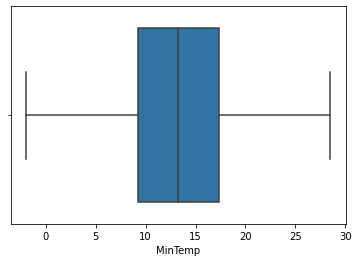

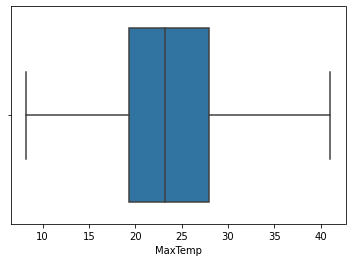

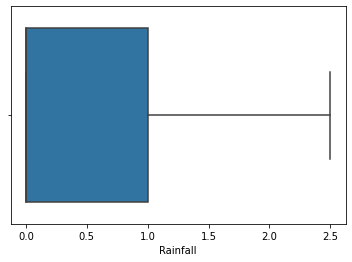

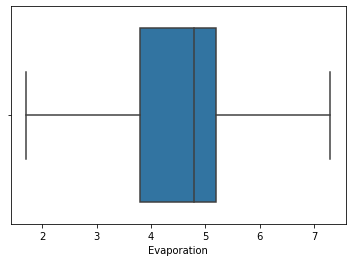

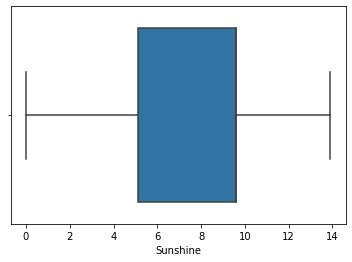

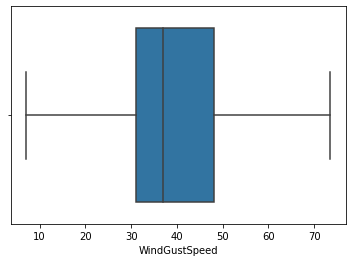

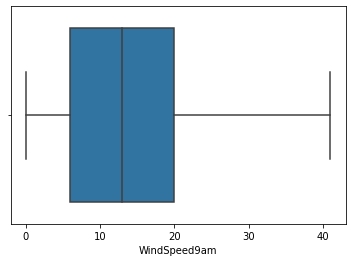

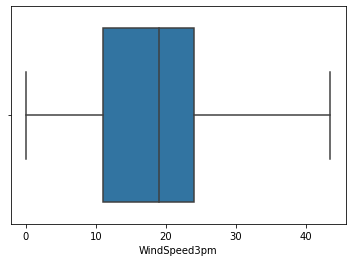

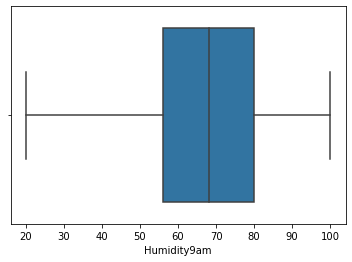

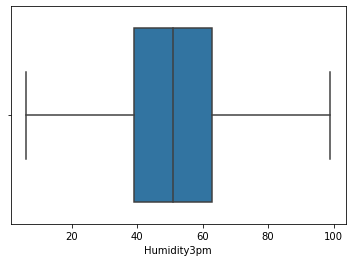

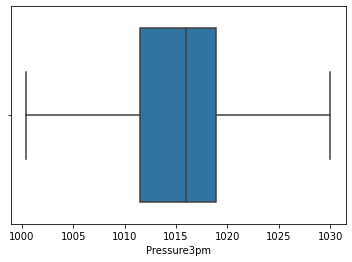

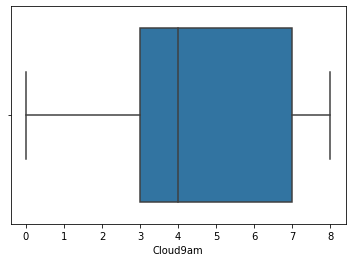

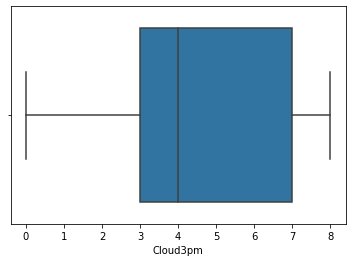

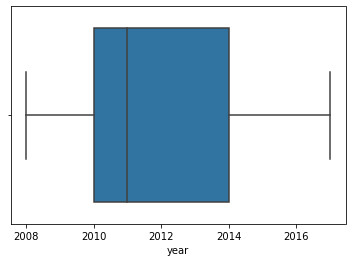

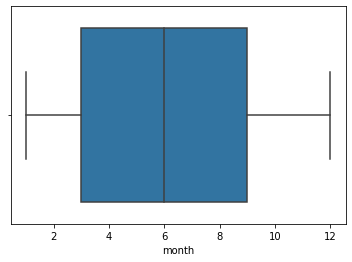

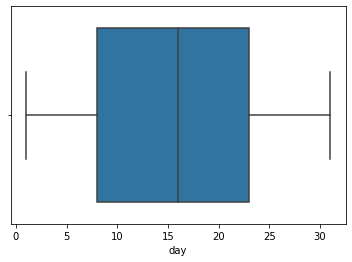

In [99]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

In [100]:
data[num].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Rainfall         1.226519
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
year             0.421639
month            0.054225
day              0.000577
dtype: float64

In [101]:
# Skewness has been handled

In [103]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [104]:
for i in num:
    trans=power_transform(data[num])
    data[i]=sc.fit_transform(trans)

In [105]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018


In [106]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018


In [107]:
chitest=data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,Albury,NNW,SE,NW,Yes
1,Albury,N,SSE,ESE,Yes
2,Albury,NNE,NE,ENE,Yes
3,Albury,W,NNW,NNW,Yes
4,Albury,ENE,SSW,E,Yes
...,...,...,...,...,...
8181,Uluru,E,ESE,E,No
8182,Uluru,E,SE,ENE,No
8183,Uluru,NNW,SE,N,No
8184,Uluru,N,SE,WNW,No


In [108]:
import numpy as np
### let's perform label encoding on WindGustDir
ordinal_label = {k: i for i, k in enumerate(chitest['WindGustDir'].unique(), 0)}
chitest['WindGustDir'] = chitest['WindGustDir'].map(ordinal_label)

In [109]:
ordinal_label = {k: i for i, k in enumerate(chitest['Location'].unique(), 0)}
chitest['Location'] = chitest['Location'].map(ordinal_label)

In [110]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir9am'].unique(), 0)}
chitest['WindDir9am'] = chitest['WindDir9am'].map(ordinal_label)

In [111]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir3pm'].unique(), 0)}
chitest['WindDir3pm'] = chitest['WindDir3pm'].map(ordinal_label)

In [112]:
chitest['RainTomorrow'].replace('No',0,inplace=True)
chitest['RainTomorrow'].replace('Yes',1,inplace=True)

In [113]:
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,0,0,0,0,1
1,0,1,1,1,1
2,0,2,2,2,1
3,0,3,3,3,1
4,0,4,4,4,1
...,...,...,...,...,...
8181,11,12,7,4,0
8182,11,12,0,2,0
8183,11,0,0,9,0
8184,11,1,0,5,0


In [114]:
inp=chitest.drop('RainTomorrow',axis=1)
out=chitest['RainTomorrow']

In [115]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(inp,out)

In [116]:
f_p_values

(array([34.02791176,  2.63753342, 20.16354411,  0.47166443]),
 array([5.43271338e-09, 1.04365465e-01, 7.10950475e-06, 4.92222447e-01]))

In [117]:
p_values=pd.Series(f_p_values[1])
p_values.index=inp.columns
p_values

Location       5.432713e-09
WindGustDir    1.043655e-01
WindDir9am     7.109505e-06
WindDir3pm     4.922224e-01
dtype: float64

<AxesSubplot:>

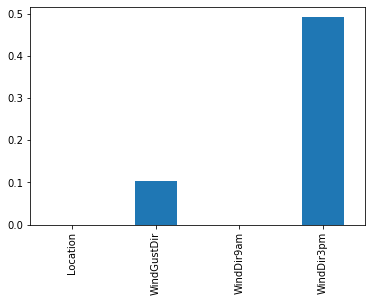

In [118]:
p_values.plot.bar()

In [119]:
16-1 * (2-1 )

15

In [120]:
data.drop('WindDir3pm',axis=1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,-0.642992,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,0.031187,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,0.161018,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,-1.794801,-1.751381,-1.751381,-1.751381,-1.751381,E,-1.751381,ESE,-1.751381,...,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,No,No,-1.751381,-1.751381,-1.751381
8182,Uluru,-1.928608,-1.876512,-1.876512,-1.876512,-1.876512,E,-1.876512,SE,-1.876512,...,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,No,No,-1.876512,-1.876512,-1.876512
8183,Uluru,-1.775739,-1.733525,-1.733525,-1.733525,-1.733525,NNW,-1.733525,SE,-1.733525,...,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,No,No,-1.733525,-1.733525,-1.733525
8184,Uluru,-1.434531,-1.412489,-1.412489,-1.412489,-1.412489,N,-1.412489,SE,-1.412489,...,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,No,No,-1.412489,-1.412489,-1.412489


In [121]:
data['RainTomorrow'].replace('No',0,inplace=True)
data['RainTomorrow'].replace('Yes',1,inplace=True)

data['RainToday'].replace('No',0,inplace=True)
data['RainToday'].replace('Yes',1,inplace=True)

In [122]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,0,1,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,0,1,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,0,1,0.161018,0.161018,0.161018


In [123]:
X=data.drop('RainTomorrow',axis=1)
Y=data['RainTomorrow']

In [124]:
X.shape  , Y.shape

((8079, 21), (8079,))

In [125]:
X=pd.get_dummies(X,drop_first=True)

In [126]:
X.shape , Y.shape

((8079, 73), (8079,))

In [127]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [128]:
x.shape , y.shape

((12310, 73), (12310,))

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [130]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7709179528838342 on Random State = 176


In [131]:
# Use, Random state= 122

In [132]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=122,test_size=.3)


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [135]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    #print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

,Model,Accuracy,F1 Score
0,LogisticRegression(),76.58,75.86
1,RidgeClassifier(),76.41,75.12
2,DecisionTreeClassifier(),82.45,82.97
3,SVC(),80.26,80.05
4,KNeighborsClassifier(),77.44,80.92
5,"(DecisionTreeClassifier(max_features='sqrt', r...",85.30,85.11
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",84.19,84.57
7,SGDClassifier(),75.41,74.47
8,(DecisionTreeClassifier(random_state=751847555...,85.32,85.45
9,"(DecisionTreeClassifier(max_depth=1, random_st...",72.95,72.58


In [136]:
params = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
GCV=GridSearchCV(Bag_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500]},
             verbose=2)

In [139]:
GCV.best_estimator_

BaggingClassifier(max_features=5, max_samples=0.5, n_estimators=100)

In [140]:
GCV.best_params_

{'max_features': 5, 'max_samples': 0.5, 'n_estimators': 100}

In [141]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7744381261846737

<AxesSubplot:>

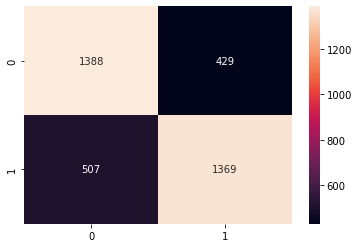

In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [143]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

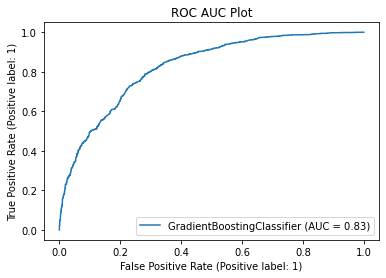

In [144]:
plot_roc_curve(GB_model,x_test,y_test)
plt.title('ROC AUC Plot')

In [145]:
import joblib
joblib.dump(GB_model,"Rainfall_Prediction.pkl")

['Rainfall_Prediction.pkl']